In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Считываем датасет
df = pd.read_csv('./extra/bank.csv', sep=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,convert
19210,58,services,married,secondary,no,688,no,no,cellular,6,8,152,2,-1,0
39107,45,technician,divorced,secondary,no,-357,yes,yes,cellular,18,5,618,1,355,1
41110,30,admin.,married,tertiary,no,591,yes,no,cellular,17,8,115,1,-1,0
2577,31,admin.,single,secondary,no,513,yes,no,unknown,13,5,180,1,-1,0
15886,25,services,single,secondary,no,79,no,yes,cellular,21,7,24,28,-1,0
13857,37,entrepreneur,married,tertiary,no,227,yes,no,cellular,10,7,283,1,-1,0
15006,37,management,married,secondary,yes,33,no,yes,cellular,17,7,117,1,-1,0
2647,30,management,single,tertiary,no,623,yes,no,unknown,13,5,159,2,-1,0
39791,49,technician,married,secondary,no,1684,no,yes,cellular,1,6,412,2,-1,1
22391,34,management,single,tertiary,no,478,yes,no,cellular,22,8,73,2,-1,0


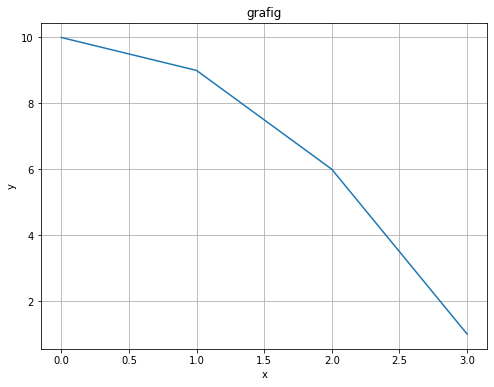

In [6]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('grafig')
plt.grid();

In [7]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766


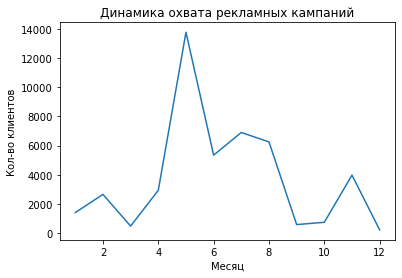

In [8]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

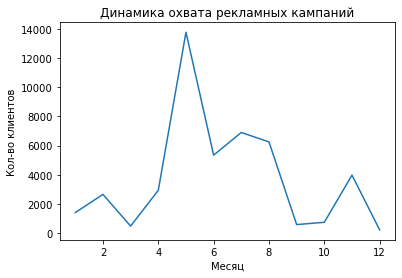

In [9]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

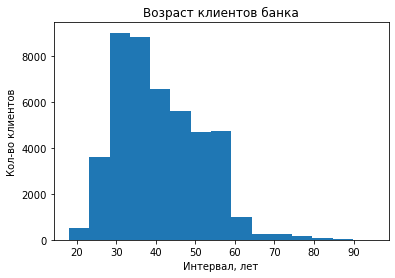

In [12]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

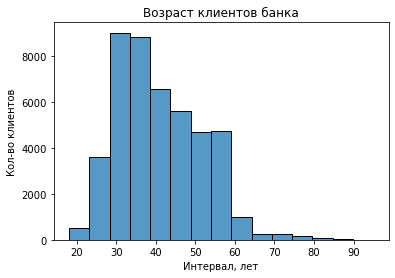

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

In [14]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


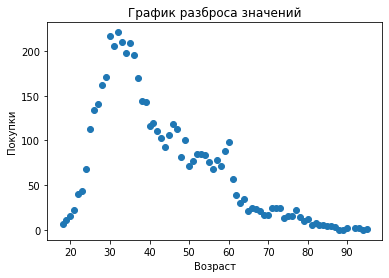

In [15]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

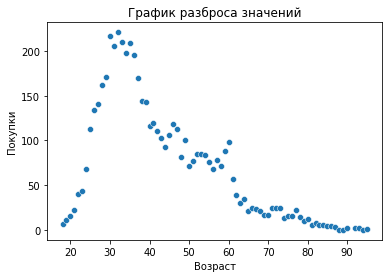

In [16]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

In [17]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


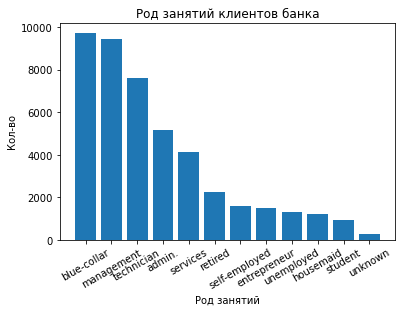

In [18]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

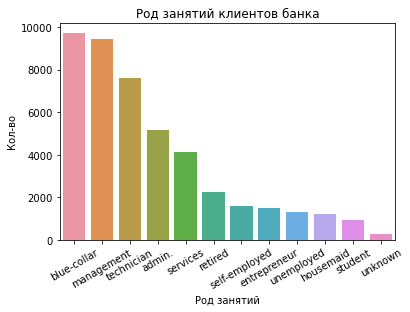

In [19]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

In [20]:
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


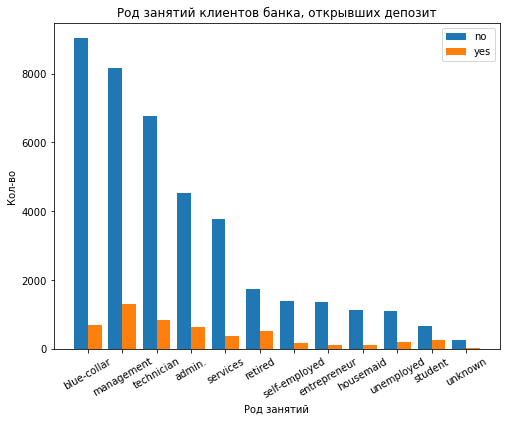

In [21]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

In [34]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


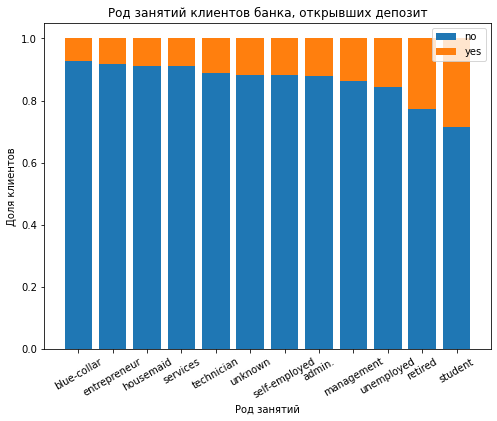

In [23]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

In [24]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

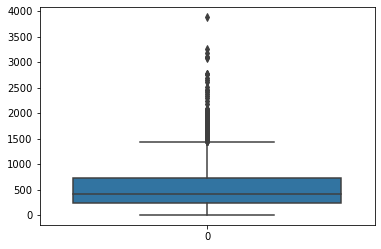

In [25]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

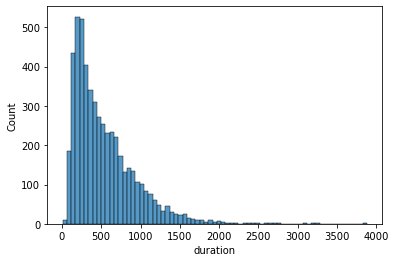

In [26]:
sns.histplot(x=data1);

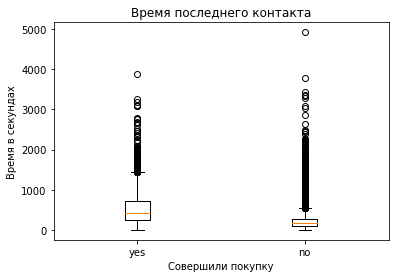

In [27]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

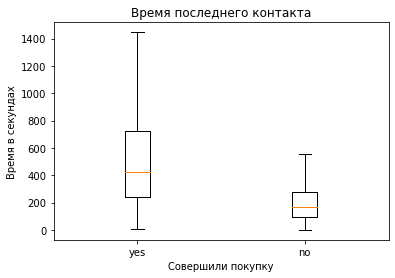

In [28]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

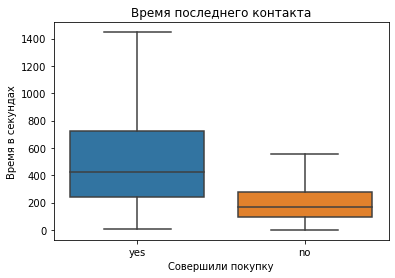

In [29]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

In [30]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     39922
yes     5289
Name: convert, dtype: int64

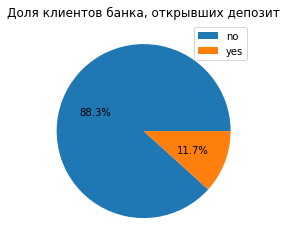

In [31]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);